In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot') # optional: for ggplot-like style

In [2]:
canada_df = pd.read_excel('canada_immigration.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

#clean the data set
canada_df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
canada_df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
canada_df['Total'] = canada_df.sum(axis=1)
canada_df.set_index('Country', inplace=True)
canada_df.index.name = None
canada_df.columns = list(map(str, canada_df.columns))

years = list(map(str, range(1980, 2014)))

In [3]:
total_immigration = pd.DataFrame(canada_df[years].sum(axis=0))
total_immigration.index = map(int, total_immigration.index)
total_immigration.reset_index(inplace = True)
total_immigration.columns = ['year', 'total']
total_immigration

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

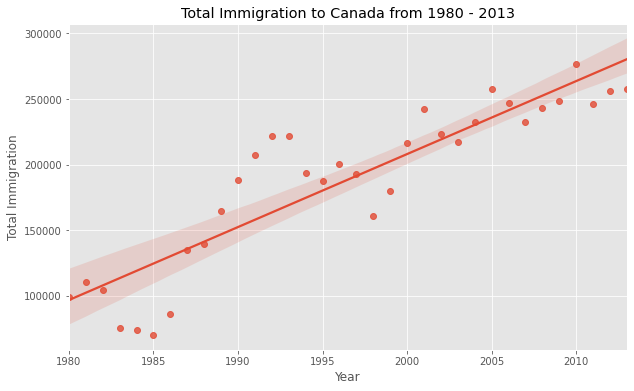

In [4]:
ax = sns.regplot(x='year', y='total', data=total_immigration)
ax.figure.set_size_inches(10, 6)
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

**Question**: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

Text(0.5, 1.0, 'Total Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')

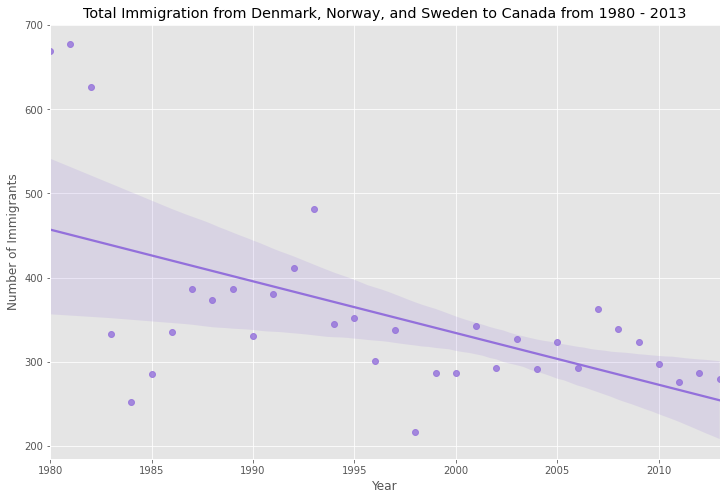

In [5]:
df_countries = canada_df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace=True)
df_total.rename(columns={'index':'year', 0:'total'}, inplace=True)

ax = sns.regplot(x='year', y='total', data=df_total, color='mediumpurple')
ax.figure.set_size_inches(12, 8)
ax.set(xlabel='Year', ylabel='Number of Immigrants')
ax.set_title('Total Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')